# Pymaceuticals Inc.
---

### Analysis

- After reviewing the data on tumor volume for each drug regimen, the drugs Capomulin and Ramicane show some promise. Capomulin shows a negative correlation coefficient of -0.58, while Ramicane is -0.63. Both drugs merit further research to show if they can reliably reduce the size of tumors in mice.


- None of the other drugs presented any merits for further research, with all of them except for Capomulin and Ramicane showing a positive correlation, which is to be expected as tumors grow or metastisize. All of the other drugs had a positive correlation coefficient of 0.91 or greater. 

 
- That said, Capomulin and Ramicane were used to treat more mice than the other regimens, so additional testing on some of the other drugs could have merit; especially Infubinol, which had a significant outlier in the data.


- As expected, there is a positive correlation between mouse weight and tumor size, which both makes sense from a metabolic and logical point of view, but it is shown below for confirmation.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
results.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [2]:
# Checking the number of mice.
results['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

## This is a solution I worked out before finding the duplicated function.
# duplicates = []
# for x in range(len(results)):
#     mouseid = results.loc[x, 'Mouse ID']
#     time = results.loc[x, 'Timepoint']
#     for y in range(len(results)):
#         if results.loc[y, 'Mouse ID'] == mouseid and results.loc[y, 'Timepoint'] == time:
#             duplicates.append(results.loc[y, 'Mouse ID'])
# print(duplicates)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

duplicates = results.loc[results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df = []
for x in range(len(duplicates)):
    mouseid = duplicates[x]
    for y in range(len(results)):
        if mouseid == results.loc[y, 'Mouse ID']:
            duplicate_df.append(results.loc[y, :])
        
duplicate_all = pd.DataFrame(duplicate_df)
duplicate_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

for x in range(len(duplicates)):
    mouseid = duplicates[x]
    for y in range(len(results)):
        if mouseid == results.loc[y, 'Mouse ID']:
            results.drop([y], inplace=True)

results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
results['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_var = results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sem = results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

drug_summary = pd.DataFrame({'Mean Tumor Volume': drug_mean,
                            'Median Tumor Volume': drug_median,
                             'Tumor Volume Variance': drug_var,
                             'Tumor Volume Std. Dev.': drug_std,
                             'Tumor Volume Std. Err.': drug_sem})

drug_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


drug_summary_agg = results.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

drug_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

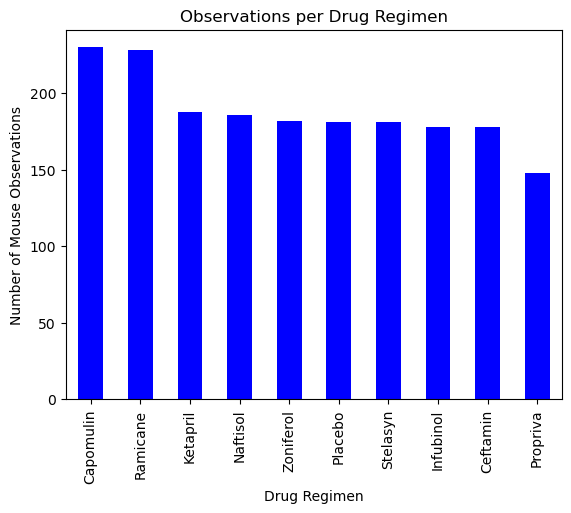

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

results["Drug Regimen"].value_counts().plot(kind='bar', color='b', 
                                            xlabel='Drug Regimen', ylabel='Number of Mouse Observations', 
                                            title='Observations per Drug Regimen')

plt.show()

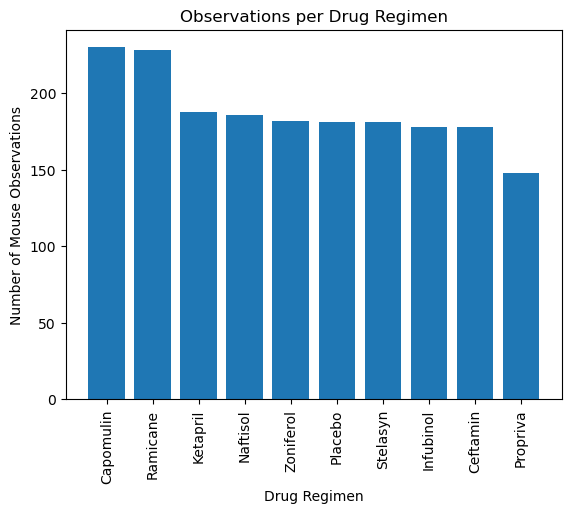

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x=results["Drug Regimen"].value_counts().index
y=results["Drug Regimen"].value_counts()

plt.bar(x, y)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Mouse Observations')
plt.title('Observations per Drug Regimen')
plt.show()

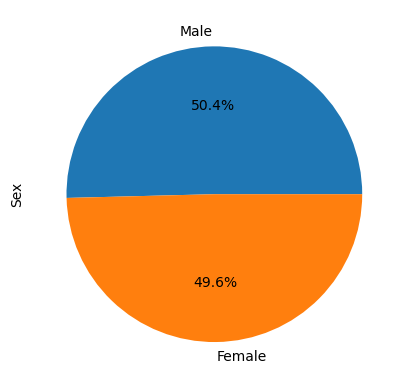

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# This result will be different from the suggested output, but I believe mine is correct. The pie chart generated
# in the guide code shows the female/male distribution of the 'Observations,' not of the mice themselves. This groupby
# function takes one row from each observed mouse in order to get the actual distribution of female versus male mice, 
# as opposed to the distribution of the observations. I do believe that is more in spirit with the instructions. 

# Just in case, you can comment out my code and run this line of code for results as shown in the guide.
# results['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

sexdf = results.groupby('Mouse ID')['Sex'].first()

sexdf.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

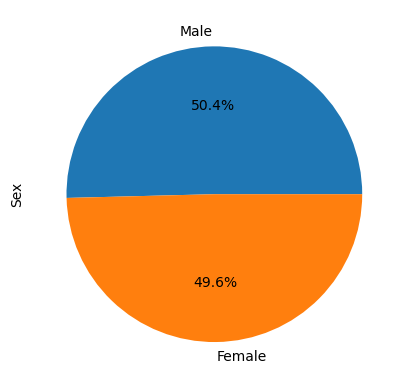

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Same note as above. I believe my charts, which are different than the guide results, are more
# reflective of the instructions.

# But this code will show the results as suggested in the guide. 
# plt.pie(results['Sex'].value_counts(), labels=results['Sex'].value_counts().index, autopct='%1.1f%%')
# plt.ylabel('Sex')

plt.pie(sexdf.value_counts(), labels=sexdf.value_counts().index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_final = results.groupby('Mouse ID')['Timepoint'].max()
pd.DataFrame(mouse_final)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

results_final = pd.merge(mouse_final, results, how='left', on=['Mouse ID', 'Timepoint'])
results_final.set_index('Mouse ID', inplace=True)
results_final

#Rename columns (this is a suggestion for me)


,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a262,45,Placebo,Female,17,29,70.717621,4
a275,45,Ceftamin,Female,20,28,62.999356,3
a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...
z435,10,Propriva,Female,12,26,48.710661,0
z578,45,Ramicane,Male,11,16,30.638696,0
z581,45,Infubinol,Female,24,25,62.754451,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Calculate Quartiles, Find Outliers, and Create a Box Plot (30 points)
# A DatFrame that has the last timepoint for each mouse ID is created using groupby. (5 points)
# The index of the DataFrame is reset. (2 points)
# Retrieve the maximum timepoint for each mouse. (2 points)
# The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list. (3 points)
# An empty list is created to fill with tumor volume data. (3 points)
# A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group (10 points)
# A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group. (5 points)

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# regimens

# Create empty list to fill with tumor vol data (for plotting)

capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html 

def find_outliers(drug):
    singledrug = results_final.loc[results_final['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    quartiles = singledrug.quantile([0.25,0.5,0.75])
    firstquart = quartiles[0.25]
    thirdquart = quartiles[0.75]
    IQR = round(thirdquart - firstquart, 2)
    lowbound = round(firstquart - (1.5*IQR), 2)
    upbound = round(thirdquart + (1.5*IQR), 2)
    outliers = singledrug.loc[(singledrug < lowbound) | (singledrug > upbound)].round(2)
    print(f"{drug}'s interquartile range is {IQR}.")
    print(f"Values below {lowbound} or higher than {upbound} could be outliers.")
    if len(outliers) > 0:
        for x in range(len(outliers)):
            print(f"Mouse ID {outliers.index[x]} could be an outlier with a tumor volume of {outliers[x]}.")
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    return singledrug
    
capomulin = find_outliers('Capomulin')
ramicane = find_outliers('Ramicane')
infubinol = find_outliers('Infubinol')
ceftamin = find_outliers('Ceftamin')



Capomulin's interquartile range is 7.78.
Values below 20.71 or higher than 51.83 could be outliers.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Ramicane's interquartile range is 9.1.
Values below 17.91 or higher than 54.31 could be outliers.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Infubinol's interquartile range is 11.48.
Values below 36.83 or higher than 82.75 could be outliers.
Mouse ID c326 could be an outlier with a tumor volume of 36.32.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Ceftamin's interquartile range is 15.58.
Values below 25.35 or higher than 87.67 could be outliers.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


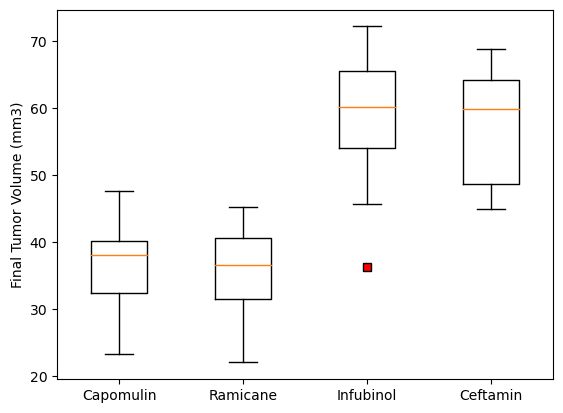

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# https://python-charts.com/distribution/box-plot-matplotlib/

plt.boxplot([capomulin, ramicane, infubinol, ceftamin], flierprops = dict(marker = "s", markerfacecolor = "red"), labels=regimens)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm133', 'm269', 'm331', 'm546', 'm550', 'm601', 'm650', 'm756', 'm957',

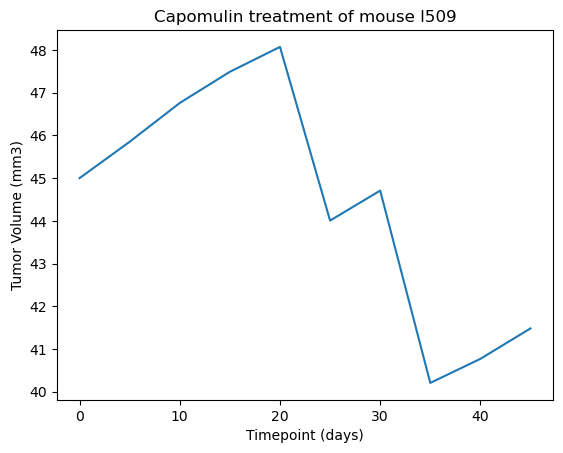

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

print(list(results_final.index))
singlemouse = input('Please input a mouse ID: (example: l509)')

mouse_over_time = results.loc[results['Mouse ID'] == singlemouse]

plt.plot(mouse_over_time['Timepoint'], mouse_over_time['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"{results_final.loc[singlemouse, 'Drug Regimen']} treatment of mouse {singlemouse}")
plt.show()

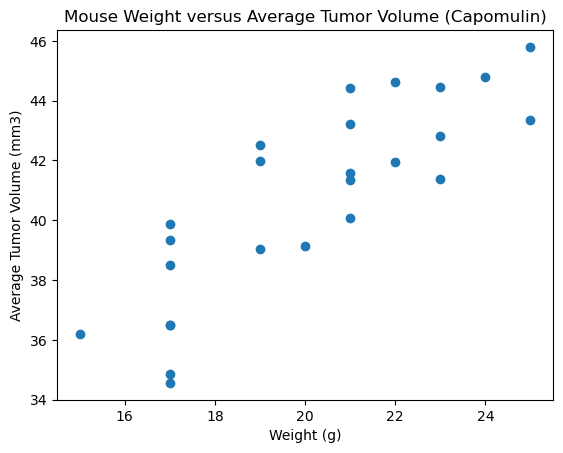

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_only = results.loc[results['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin_only.groupby('Mouse ID').mean(numeric_only=True)

plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Mouse Weight versus Average Tumor Volume (Capomulin)')
plt.show()

## Correlation and Regression

The correlation coefficient between weight and tumor volume for Capomulin is 0.84.


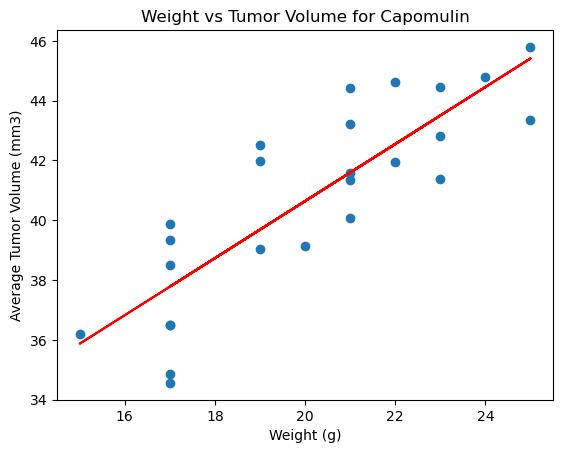

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

correlation = st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
print(f"The correlation coefficient between weight and tumor volume for Capomulin is {round(correlation[0], 2)}.")

slope=st.linregress(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])[0]
intercept=st.linregress(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])[1]

regression=capomulin_avg["Weight (g)"]* slope + intercept

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"], regression, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

In [19]:
# Quickly check for negative correlation between tumor size and time for each drug to confirm Capomulin and Ramicane
# offer best hope for reducing tumor size

regimencheck = drug_summary.index

for drugs in regimencheck:
    checkdrug = results.loc[results['Drug Regimen'] == drugs]
    correlationcheck = st.pearsonr(checkdrug['Timepoint'], checkdrug['Tumor Volume (mm3)'])
    print(f"The correlation coefficient between weight and tumor volume for {drugs} is {round(correlationcheck[0], 2)}.")

The correlation coefficient between weight and tumor volume for Capomulin is -0.58.
The correlation coefficient between weight and tumor volume for Ceftamin is 0.96.
The correlation coefficient between weight and tumor volume for Infubinol is 0.94.
The correlation coefficient between weight and tumor volume for Ketapril is 0.93.
The correlation coefficient between weight and tumor volume for Naftisol is 0.93.
The correlation coefficient between weight and tumor volume for Placebo is 0.91.
The correlation coefficient between weight and tumor volume for Propriva is 0.93.
The correlation coefficient between weight and tumor volume for Ramicane is -0.63.
The correlation coefficient between weight and tumor volume for Stelasyn is 0.92.
The correlation coefficient between weight and tumor volume for Zoniferol is 0.94.


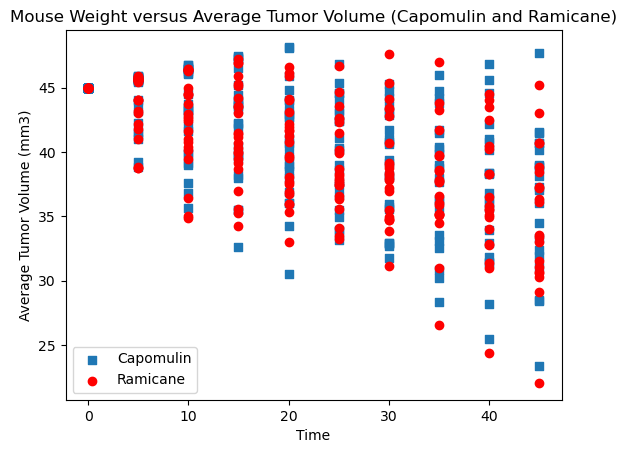

The correlation coefficient between weight and tumor volume for Capomulin is -0.58.
The correlation coefficient between weight and tumor volume for Ramicane is -0.63.


In [20]:
# A closer look at the two drugs that appear to be successful in reducing tumor volume


ramicane_only = results.loc[results['Drug Regimen'] == "Ramicane"]

plt.scatter(capomulin_only['Timepoint'], capomulin_only['Tumor Volume (mm3)'], marker='s')
plt.scatter(ramicane_only['Timepoint'], ramicane_only['Tumor Volume (mm3)'], color='r')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Time')
plt.title('Mouse Weight versus Average Tumor Volume (Capomulin and Ramicane)')
plt.legend(['Capomulin', 'Ramicane'])
plt.show()

correlationcapo = st.pearsonr(capomulin_only['Timepoint'], capomulin_only['Tumor Volume (mm3)'])
correlationrami = st.pearsonr(ramicane_only['Timepoint'], ramicane_only['Tumor Volume (mm3)'])
print(f"The correlation coefficient between weight and tumor volume for Capomulin is {round(correlationcapo[0], 2)}.")
print(f"The correlation coefficient between weight and tumor volume for Ramicane is {round(correlationrami[0], 2)}.")